# Imports

In [1]:
# Import necessary libraries
from copy import deepcopy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

%matplotlib inline
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
import itertools
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import manifold
import sklearn.datasets 
from sklearn.preprocessing import normalize

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../../Datensaetze/news_POS_POS_tags_nouns_adjectives_verb.csv")

In [3]:
df.head(5)

category filename                              title  \
0  business  001.txt  Ad sales boost Time Warner profit   
1  business  002.txt   Dollar gains on Greenspan speech   
2  business  003.txt  Yukos unit buyer faces loan claim   
3  business  004.txt  High fuel prices hit BA's profits   
4  business  005.txt  Pernod takeover talk lifts Domecq   

                                             content  number_of_tokens  \
0   Quarterly profits at US media giant TimeWarne...             415.0   
1   The dollar has hit its highest level against ...             379.0   
2   The owners of embattled Russian oil giant Yuk...             258.0   
3   British Airways has blamed high fuel prices f...             400.0   
4   Shares in UK drinks and food firm Allied Dome...             260.0   

   number_of_types                                       stemmed_text  \
0            244.0   quarterli profit at US media giant timewarn j...   
1            230.0   the dollar ha hit it highest level against th...   
2            168.0   the owner of embattl russian oil giant yuko a...   
3            256.0   british airway ha blame high fuel price for a...   
4            178.0   share in UK drink and food firm alli domecq h...   

                                            POS_tags  \
0  ['_SP', 'NNP', 'NNS', 'IN', 'NNP', 'NNS', 'NN'...   
1  ['_SP', 'DT', 'NN', 'VBZ', 'VBN', 'PRP$', 'JJS...   
2  ['_SP', 'DT', 'NNS', 'IN', 'VBN', 'JJ', 'NN', ...   
3  ['_SP', 'NNP', 'NNP', 'VBZ', 'VBN', 'JJ', 'NN'...   
4  ['_SP', 'NNP', 'IN', 'NNP', 'NNS', 'CC', 'NN',...   

                                                 POS  nouns  adjectives  verb  
0  high fourth own fourth underlying exceptional ...   74.0        22.0   1.0  
1  late recent sanguine current current next shar...   66.0        30.0   9.0  
2  Russian former similar foreign Legal such real...   48.0        12.0   3.0  
3  high pre - tax chief respectable third full la...   77.0        31.0   2.0  
4  French last major global top other Last LVMH b...   42.0        13.0   2.0

In [4]:
df.shape

(2225, 12)

In [5]:
import re

def tokenize(doc):
    return re.findall('\w+', doc)

In [6]:
from nltk.corpus import stopwords

english_stop_words = stopwords.words('english')
#english_stop_words

# TSNE

In [7]:
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from yellowbrick.text import TSNEVisualizer

vec = TfidfVectorizer(tokenizer=tokenize,
                      stop_words=english_stop_words,
                      use_idf=True)

data = vec.fit_transform(df.content)

In [8]:
X_reduced = TruncatedSVD(n_components=10, random_state=0).fit_transform(data)

In [9]:
perplexity = [50]
for p in perplexity:
    X_embedded = TSNE(n_components=2, perplexity=p, n_iter=1000,learning_rate=10, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2225 samples in 0.010s...
[t-SNE] Computed neighbors for 2225 samples in 0.349s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2225
[t-SNE] Computed conditional probabilities for sample 2000 / 2225
[t-SNE] Computed conditional probabilities for sample 2225 / 2225
[t-SNE] Mean sigma: 0.047117
[t-SNE] Computed conditional probabilities in 0.277s
[t-SNE] Iteration 50: error = 73.8804932, gradient norm = 0.0000269 (50 iterations in 1.433s)
[t-SNE] Iteration 100: error = 63.6691895, gradient norm = 0.0044037 (50 iterations in 1.045s)
[t-SNE] Iteration 150: error = 60.4904709, gradient norm = 0.0013181 (50 iterations in 1.017s)
[t-SNE] Iteration 200: error = 59.9612465, gradient norm = 0.0005122 (50 iterations in 1.088s)
[t-SNE] Iteration 250: error = 59.7813454, gradient norm = 0.0002798 (50 iterations in 1.069s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.781345
[t-SNE] Iteration 300: err

In [10]:
kmeans = KMeans(n_clusters=5, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(X_embedded)
prediction = kmeans.predict(X_embedded)
prediction

array([0, 0, 0, ..., 3, 4, 4])

Text(0.5, 1.0, 'TSNE')

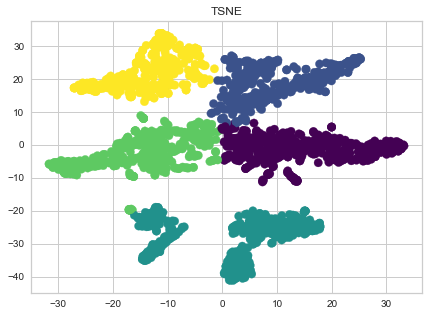

In [11]:
plt.figure(figsize=(7,5))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=prediction, s=70, cmap='viridis')

plt.title('TSNE')
#plt.savefig('K_Means/TSNE_K-Means_POS.png', bbox_inches = "tight")

Text(0.5, 1.0, 'TSNE')

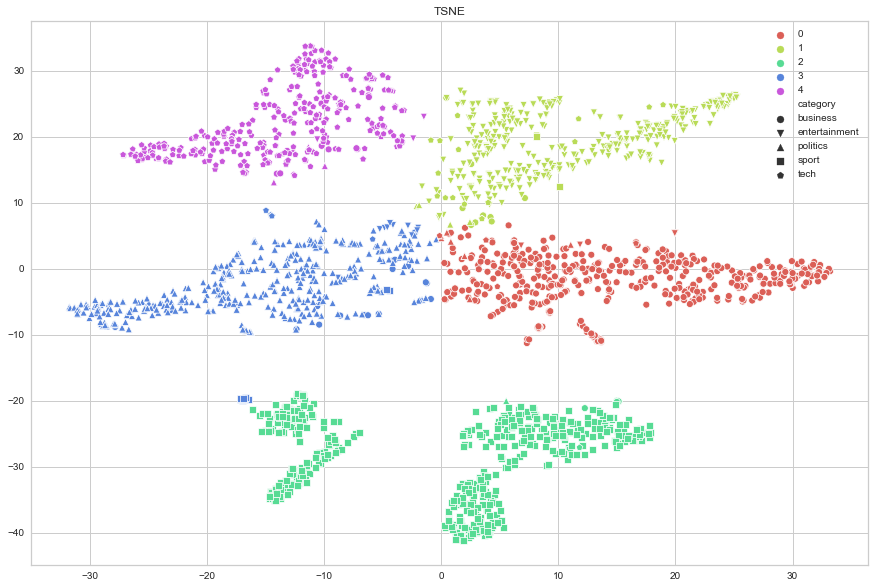

In [12]:
markers = ('o', 'v', '^', 's', 'p', '*','d', 'P', 'X')
plt.figure(figsize=(15,10))
sns.scatterplot(X_embedded[:, 0], X_embedded[:, 1],hue=prediction, style=df.category, markers=markers, palette=sns.color_palette("hls", len(np.unique(prediction))))

plt.title('TSNE')
#plt.savefig('../../Bilder/KMeans/kmeans_tsne_categorymarker_stemming_5_Cluster.png', bbox_inches = "tight")

# PCA

## Code Einführungsseminar

In [13]:
max_features = 1000
vec = TfidfVectorizer(max_features=max_features, 
                      tokenizer=tokenize,
                      stop_words=english_stop_words,
                      use_idf=True)
X = vec.fit_transform(df.content) #vectorizer creates a sparse matrix. 
df1 = pd.DataFrame(X.todense(), #has to be converted to a dense matrix
                  index=df.category, 
                  columns=vec.get_feature_names())
df1

0       000         1        10  100        11        12       13  \
category                                                                        
business  0.0  0.046158  0.043863  0.048524  0.0  0.062370  0.000000  0.00000   
business  0.0  0.000000  0.075512  0.000000  0.0  0.000000  0.000000  0.00000   
business  0.0  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.00000   
business  0.0  0.046088  0.087593  0.048450  0.0  0.062275  0.000000  0.06889   
business  0.0  0.000000  0.140355  0.077634  0.0  0.000000  0.000000  0.00000   
...       ...       ...       ...       ...  ...       ...       ...      ...   
tech      0.0  0.079106  0.037586  0.000000  0.0  0.000000  0.000000  0.00000   
tech      0.0  0.033955  0.000000  0.035696  0.0  0.000000  0.000000  0.00000   
tech      0.0  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.00000   
tech      0.0  0.000000  0.000000  0.000000  0.0  0.056663  0.054133  0.00000   
tech      0.0  0.009818  0.000000  0.041283  0.0  0.026531  0.000000  0.00000   

           14        15  ...     world  worth     would  wrong      year  \
category                 ...                                               
business  0.0  0.000000  ...  0.000000    0.0  0.000000    0.0  0.119226   
business  0.0  0.000000  ...  0.000000    0.0  0.000000    0.0  0.025657   
business  0.0  0.000000  ...  0.000000    0.0  0.036230    0.0  0.000000   
business  0.0  0.000000  ...  0.040307    0.0  0.030419    0.0  0.178567   
business  0.0  0.000000  ...  0.000000    0.0  0.000000    0.0  0.047688   
...       ...       ...  ...       ...    ...       ...    ...       ...   
tech      0.0  0.000000  ...  0.000000    0.0  0.026106    0.0  0.000000   
tech      0.0  0.000000  ...  0.029697    0.0  0.000000    0.0  0.000000   
tech      0.0  0.000000  ...  0.025147    0.0  0.018978    0.0  0.037135   
tech      0.0  0.000000  ...  0.000000    0.0  0.000000    0.0  0.054159   
tech      0.0  0.040894  ...  0.111621    0.0  0.045359    0.0  0.019019   

             years       yet      york  young     yukos  
category                                                 
business  0.000000  0.000000  0.000000    0.0  0.000000  
business  0.000000  0.000000  0.120873    0.0  0.000000  
business  0.000000  0.000000  0.000000    0.0  0.585566  
business  0.000000  0.059416  0.000000    0.0  0.000000  
business  0.000000  0.095206  0.000000    0.0  0.000000  
...            ...       ...       ...    ...       ...  
tech      0.000000  0.000000  0.000000    0.0  0.000000  
tech      0.000000  0.000000  0.000000    0.0  0.000000  
tech      0.000000  0.037068  0.000000    0.0  0.000000  
tech      0.000000  0.000000  0.000000    0.0  0.000000  
tech      0.051378  0.000000  0.000000    0.0  0.000000  

[2225 rows x 1000 columns]

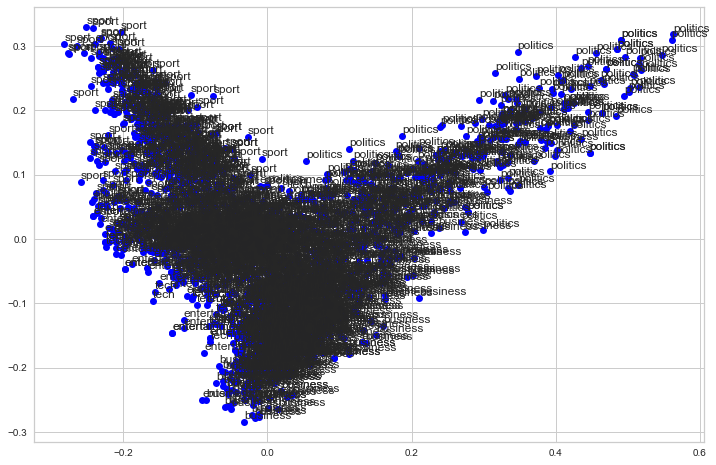

In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df1)   
plt.figure(figsize=(12,8))
for category, coord in zip(df1.index, X_pca):
        plt.plot(coord[0], coord[1], 'o', color='blue')
        plt.text(coord[0], coord[1]+0.005, category)

## Code Clusteringseminar

In [28]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from yellowbrick.features import PCA

vec1 = TfidfVectorizer(tokenizer=tokenize,
                      stop_words=english_stop_words,
                      use_idf=True)

data1 = vec1.fit_transform(df.stemmed_text)

In [29]:
X_reduced1 = TruncatedSVD(n_components=10, random_state=0).fit_transform(data1)

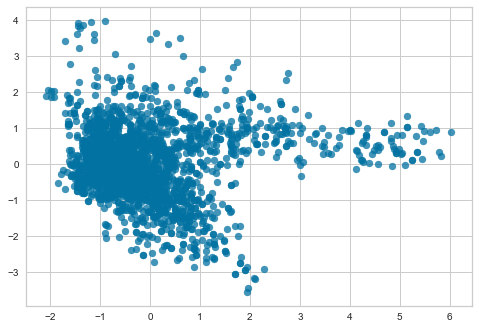

In [30]:
perplexity = [50]
for p in perplexity:
    X_embedded1 = PCA(n_components=2, perplexity=p, n_iter=1000,learning_rate=10, verbose=2).fit_transform(X_reduced1)

In [31]:
kmeans = KMeans(n_clusters=10, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(X_embedded1)
prediction = kmeans.predict(X_embedded1)
prediction

array([2, 2, 9, ..., 3, 5, 4])

Text(0.5, 1.0, 'PCA')

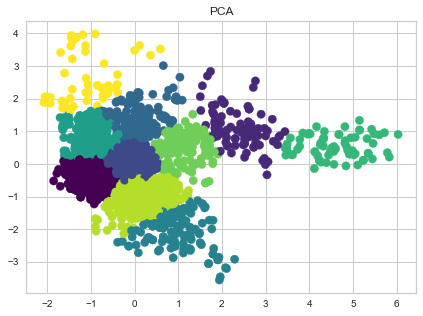

In [32]:
plt.figure(figsize=(7,5))
plt.scatter(X_embedded1[:, 0], X_embedded1[:, 1], c=prediction, s=70, cmap='viridis')

plt.title('PCA')
#plt.savefig('K_Means/TSNE_K-Means_POS.png', bbox_inches = "tight")

Text(0.5, 1.0, 'PCA')

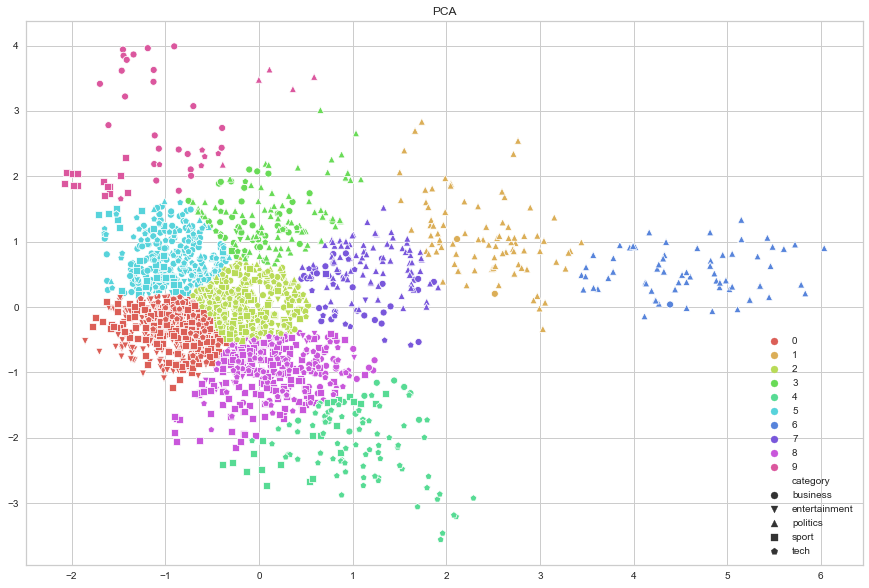

In [33]:
markers = ('o', 'v', '^', 's', 'p', '*','d', 'P', 'X')
plt.figure(figsize=(15,10))
sns.scatterplot(X_embedded1[:, 0], X_embedded1[:, 1],hue=prediction, style=df.category, markers=markers, palette=sns.color_palette("hls", len(np.unique(prediction))))

plt.title('PCA')
#plt.savefig('../../Bilder/KMeans/kmeans_pca_content', bbox_inches = "tight")

# UMAP

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.datasets import load_hobbies
from yellowbrick.text import UMAPVisualizer
import umap
import sklearn.cluster as cluster

In [35]:
vec2 = TfidfVectorizer(tokenizer=tokenize,
                       stop_words=english_stop_words,
                       use_idf=True)

data2 = vec2.fit_transform(df.content)


#tfidf = TfidfVectorizer()
#data = df[:100]
#docs = tfidf.fit_transform(df.content)

In [36]:
kmeans_labels = cluster.KMeans(n_clusters=10, max_iter=600, algorithm='auto').fit_predict(data2)

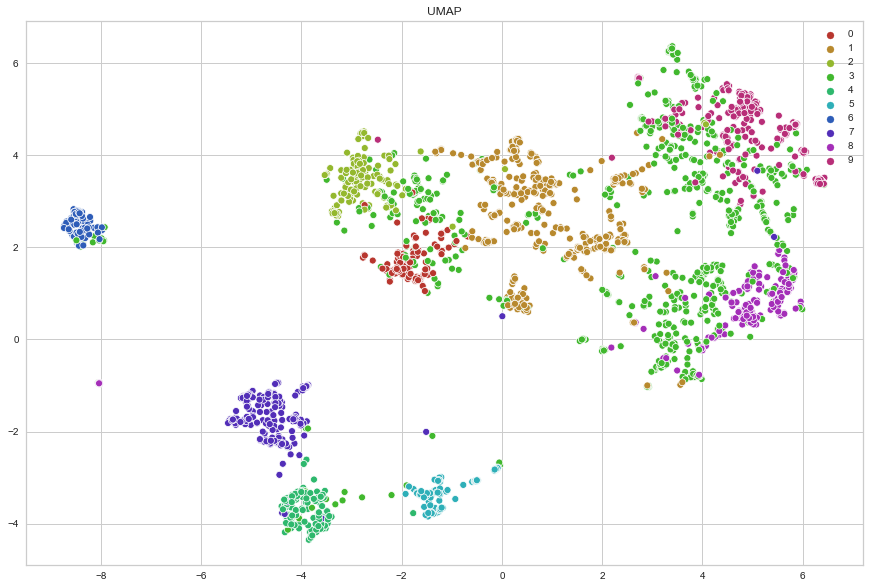

In [38]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(data2)

plt.figure(figsize=(15,10))
sns.scatterplot(standard_embedding[:, 0], y=standard_embedding[:, 1], hue=kmeans_labels, palette=sns.hls_palette(n_colors=len(np.unique(kmeans_labels)), l=0.45, s=.6))
plt.title('UMAP')
plt.legend()
#plt.savefig('../../Bilder/KMeans/UMAP_kmeans_content.png')
plt.show()

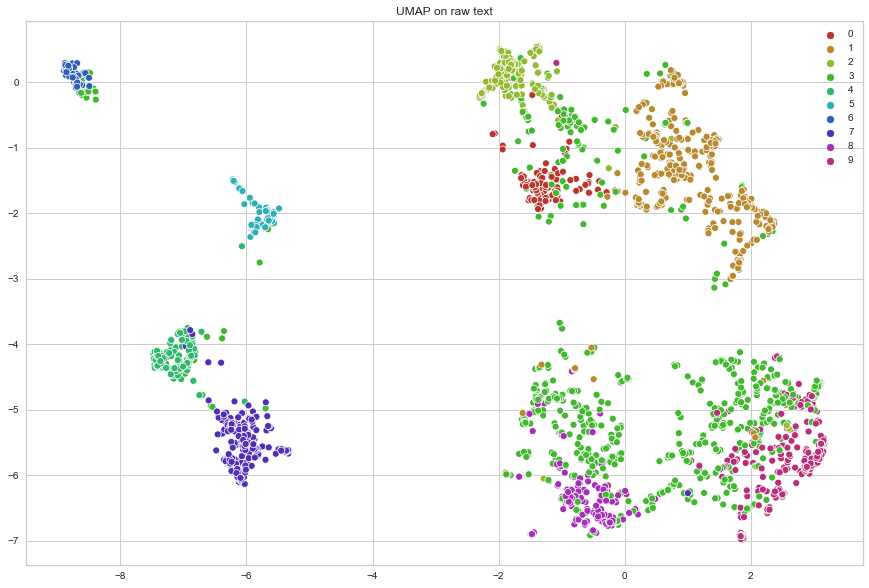

In [39]:
# tune parameters
improved_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=2, random_state=42).fit_transform(data2)

plt.figure(figsize=(15,10))
sns.scatterplot(improved_embedding[:, 0], y=improved_embedding[:, 1], hue=kmeans_labels, palette=sns.hls_palette(n_colors=len(np.unique(kmeans_labels)), l=0.45, s=.6))
plt.title('UMAP on raw text')
plt.legend()
#plt.savefig('improved_UMAP_kmeans_text.png')
plt.show()